In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

# Condiciones iniciales

In [17]:
# Definición  de parametros
deltax = deltay = h = 0.02
deltat = 0.001

a = 0.00028
b = 0.005
tau = 0.1
kappa = -0.005

# Arreglos 
X = np.arange(0, 1 + deltax, deltax)
len_x = len(X)

Y = np.arange(0, 1 + deltay, deltay)
len_y = len(Y)

# Condiciones iniciales aleatorias
Psi_sol = np.random.rand(len_x, len_y) # x = 0
Phi_sol = np.random.rand(len_x, len_y) # x = 0

# Función para la evolución temporal

In [18]:
# Grafica Phi_sol en el paso dt en una cuadricula. n define la posición de la gráfica en esta
def plot_evolve(f, dt, n):
  loc = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

  ax1 = plt.subplot2grid((2, 3), loc[n])
  ax1.imshow(f, cmap="magma", interpolation='bilinear', extent=(min(Y),max(Y),min(X),max(X)))
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax1.set_title(f'$t = {int(dt/1000)}$s', fontsize = '16')

# Retorna el laplaciano en la posicioón i, j
def laplaciano(f, h, i, j):
  return (f[i+1][j] + f[i-1][j] + f[i][j+1] + f[i][j-1] - 4*f[i][j])/np.power(h, 2)

# Calcula la evolución temporal hasta 10s 
def temporal_evolve(Phi_sol, Psi_sol):
  # Valores de dt en los que graficar Phi_sol
  dt_values = [2000, 4000, 6000, 8000, 10000]

  plot_evolve(Phi_sol, 0, 0) # Se grafica la condición inicial

  len_evol = len_x - 1
  deltat_tau = deltat/tau

  n = 1 # Posición gráfica
  dt = 0 # Pasos
  while dt <= 10000:
    for i in range(1, len_evol): # Ciclo en x
      for j in range(1, len_evol): # Ciclo en y
        Phi_sol[i][j] += deltat*(a*laplaciano(Phi_sol, h, i, j) + Phi_sol[i][j] - np.power(Phi_sol[i][j], 3) - Psi_sol[i][j] + kappa)
        Psi_sol[i][j] += deltat_tau*(b*laplaciano(Psi_sol, h, i, j) + Phi_sol[i][j] - Psi_sol[i][j]) 

      # Condiciones de frontera de tipo Neumann
      Psi_sol[0] = Psi_sol[1] # x = 0
      Psi_sol[-1] = Psi_sol[-2]  # x = 1
      Psi_sol[0:,0] = Psi_sol[0:,1]  # y = 0
      Psi_sol[0:,-1] = Psi_sol[0:,-2]  # y = 1

      Phi_sol[0] = Phi_sol[1] # x = 0
      Phi_sol[-1] = Phi_sol[-2]  # x = 1
      Phi_sol[0:,0] = Phi_sol[0:,1]  # y = 0
      Phi_sol[0:,-1] = Phi_sol[0:,-2]  # y = 1

    # Verifica condición para graficar en t = 2s, 4s, 6s, 8s, 10s
    if dt in dt_values:
      plot_evolve(Phi_sol, dt, n)
      n += 1

    dt += 1

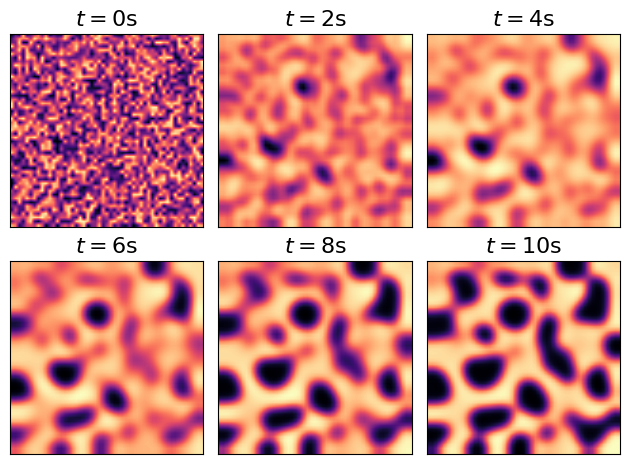

In [19]:
fig = plt.figure()
#fig.suptitle(f'$\phi(t;x,y)$')

Phi_sol = temporal_evolve(Phi_sol, Psi_sol)

plt.tight_layout()
plt.show()

A partir de aproximadamente el segundo 6 se puede apreciar que se llega a un patrón estacionario, donde por más que se siga iterando en el tiempo no se aprecia un cambio significativo en $\phi(t;x,y)
$